In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_row', 500)

In [3]:
raw_data = sns.load_dataset('titanic')
raw_data.head(50)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


In [5]:
raw_data.isna().sum() # 결측치 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
raw_data.drop(['alive', 'embark_town', 'deck', 'class'], axis=1, inplace=True) #중복행, 결측값 많은 행 제거
raw_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


In [7]:
raw_data[['who', 'age']].groupby(['who'], as_index=True).mean() #who 그룹별 평균 나이확인

,age
who,
child,6.369518
man,33.173123
woman,32.000000


In [8]:
def handle_missing(df):

    temp_df = df.copy()
    
    #age 결측치를 who 그룹별로 평균으로 채우기
    temp_df['age'].fillna(df.groupby('who')['age'].transform('mean'), inplace=True) 

    #embak_town 컬럼에 결측치 있는 경우 행 제거 
    temp_df.dropna(subset = ['embarked'], inplace = True)
    
    return temp_df

In [9]:
titanic_data = handle_missing(raw_data)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    889 non-null    int64  
 1   pclass      889 non-null    int64  
 2   sex         889 non-null    object 
 3   age         889 non-null    float64
 4   sibsp       889 non-null    int64  
 5   parch       889 non-null    int64  
 6   fare        889 non-null    float64
 7   embarked    889 non-null    object 
 8   who         889 non-null    object 
 9   adult_male  889 non-null    bool   
 10  alone       889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 71.2+ KB


In [10]:
print(titanic_data['embarked'].value_counts()) #밸류 종류, 계 확인
print(titanic_data['sex'].value_counts())

S    644
C    168
Q     77
Name: embarked, dtype: int64
male      577
female    312
Name: sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)


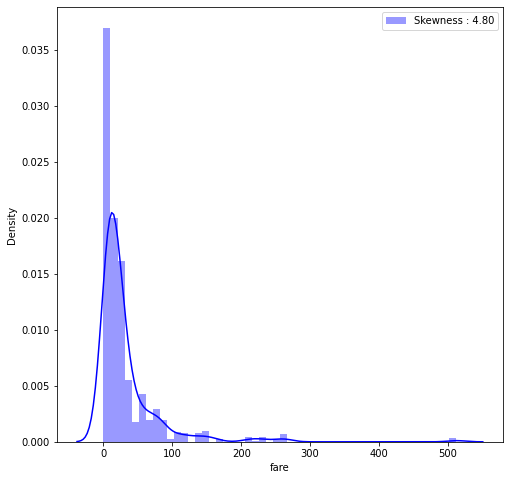

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))  #편중된 가격데이터 확인
g = sns.distplot(titanic_data['fare'], color='B', label='Skewness : {:.2f}'.format(titanic_data['fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [12]:
 def preprocess(df):
    temp_df = df.copy()

    #age컬럼 dtype 변경(소수점 제거)
    def fix_dtypes(df):
        temp_df = df.assign(age = df["age"].astype(int))
        return temp_df

    temp_df = fix_dtypes(df)

    #범주형 데이터들 인코딩
    def categorize(df):
        for column in df.columns[df.columns.isin(['sex','embarked', 'who', 'adult_male', 'alone'])]:
            temp_df[column] = df[column].factorize()[0] #factorize 범주형 
        return temp_df
    
    temp_df =  categorize(df)

    #편중된 가격데이터 log화
    def logarithm(df):
        temp_df['fare'] = df['fare'].map(lambda i: np.log(i) if i > 0 else 0)
        return temp_df
           
    temp_df = logarithm(df)

    return temp_df

In [13]:
titanic_data_processed = preprocess(titanic_data)

In [14]:
titanic_data_processed.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,1.981001,0,0,0,0
1,1,1,1,38,1,0,4.266662,1,1,1,0
2,1,3,1,26,0,0,2.070022,0,1,1,1
3,1,1,1,35,1,0,3.972177,0,1,1,0
4,0,3,0,35,0,0,2.085672,0,0,0,1


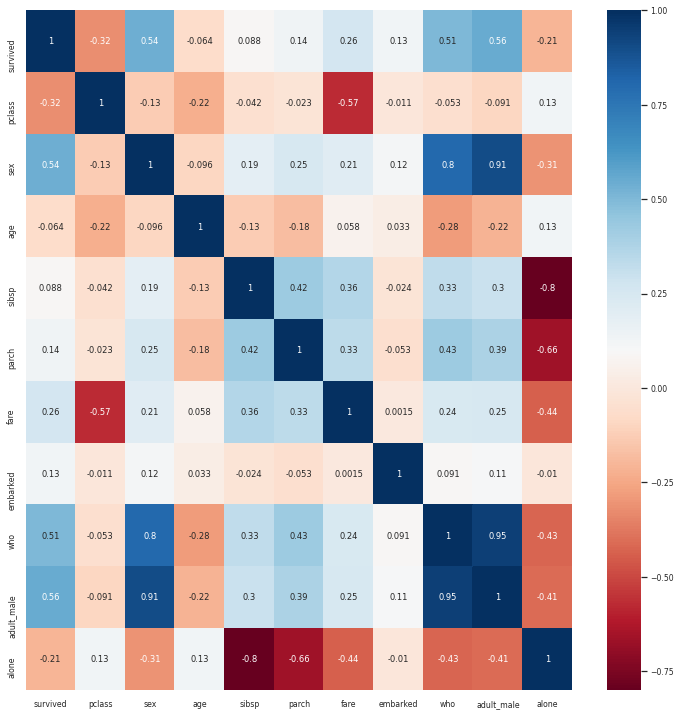

In [15]:
fig = plt.figure(figsize = (10, 10))
corr = titanic_data_processed.corr(method='kendall')
#Kendall : 단조성이 강한지

sns.set(font_scale=0.7) #heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr, annot = True, cmap = "RdBu")

plt.tight_layout()
plt.show()

In [16]:
titanic_data_processed.drop(['sibsp', 'parch', 'embarked'], axis=1, inplace=True) 

In [17]:
training_data = pd.DataFrame(titanic_data_processed.drop(columns='survived', axis=1))
target_label = pd.DataFrame(titanic_data_processed['survived'])
print(training_data.head())
print(target_label.head())

   pclass  sex  age      fare  who  adult_male  alone
0       3    0   22  1.981001    0           0      0
1       1    1   38  4.266662    1           1      0
2       3    1   26  2.070022    1           1      1
3       1    1   35  3.972177    1           1      0
4       3    0   35  2.085672    0           0      1
   survived
0         0
1         1
2         1
3         1
4         0


In [18]:
column_name = ['pclass', 'sex', 'age', 'fare', 'who',
       'adult_male', 'alone']

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)
scaled_data = pd.DataFrame(scaled_data, columns=column_name)
print(scaled_data.head())

     pclass       sex       age      fare       who  adult_male     alone
0  0.825209 -0.735342 -0.632026 -0.908614 -0.740524   -0.809626 -1.229349
1 -1.572211  1.359911  0.595940  1.374828  0.772869    1.235139 -1.229349
2  0.825209  1.359911 -0.325034 -0.819680  0.772869    1.235139  0.813439
3 -1.572211  1.359911  0.365696  1.080629  0.772869    1.235139 -1.229349
4  0.825209 -0.735342  0.365696 -0.804045 -0.740524   -0.809626  0.813439


In [20]:
print(scaled_data.describe().T)

            count          mean       std       min       25%       50%  \
pclass      889.0 -1.793341e-16  1.000563 -1.572211 -0.373501  0.825209   
sex         889.0  3.601668e-16  1.000563 -0.735342 -0.735342 -0.735342   
age         889.0  2.372805e-18  1.000563 -2.320478 -0.632026  0.135453   
fare        889.0 -4.907960e-17  1.000563 -2.887693 -0.823367 -0.219300   
who         889.0 -2.754952e-16  1.000563 -0.740524 -0.740524 -0.740524   
adult_male  889.0 -4.106202e-16  1.000563 -0.809626 -0.809626 -0.809626   
alone       889.0 -8.741914e-18  1.000563 -1.229349 -1.229349  0.813439   

                 75%       max  
pclass      0.825209  0.825209  
sex         1.359911  1.359911  
age         0.365696  3.819349  
fare        0.542961  3.345219  
who         0.772869  2.286263  
adult_male  1.235139  1.235139  
alone       0.813439  0.813439  


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, target_label, test_size=0.3, random_state=30)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape', Y_test.shape)

X_train shape: (622, 7)
Y_train shape: (622, 1)
X_test shape: (267, 7)
Y_test shape (267, 1)


In [22]:
model = Sequential()
model.add(Dense(512, input_dim=7, activation='relu')) #퍼셉트론은 2의 거듭제곱수로 하는 것이 일반적 #모델에 관련된 파라미터는 하이퍼파라미터
model.add(Dropout(0.25)) #Dropout 망각 기능, 매 epoch 마다 랜덤하게 25%는 학습을 안한다
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid')) #이진분류에서는 마지막 퍼셉트론 1개, 엑티베이션은 시그모이드
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4096      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [23]:
model.compile(loss='mse', optimizer='adam',
              metrics=['binary_accuracy'])
fit_hist = model.fit(
    X_train, Y_train, batch_size=32, epochs=64, 
    validation_split = 0.2)
    #batch_size : 1 epoch당 50 문제씩 나눠서 학습(랜덤추출), batch_size마다 미분수행하기에 학습시간이 늘어남, epoch 수를 줄일 수 있음
    #validation_split : 학습데이터를 또 떼어내서 매 epoch마다 검증

Epoch 1/64
16/16 [==============================] - 1s 18ms/step - loss: 0.1898 - binary_accuracy: 0.7445 - val_loss: 0.1462 - val_binary_accuracy: 0.7920
Epoch 2/64
16/16 [==============================] - 0s 7ms/step - loss: 0.1512 - binary_accuracy: 0.7907 - val_loss: 0.1359 - val_binary_accuracy: 0.7840
Epoch 3/64
16/16 [==============================] - 0s 6ms/step - loss: 0.1492 - binary_accuracy: 0.7686 - val_loss: 0.1282 - val_binary_accuracy: 0.8000
Epoch 4/64
16/16 [==============================] - 0s 6ms/step - loss: 0.1462 - binary_accuracy: 0.8169 - val_loss: 0.1318 - val_binary_accuracy: 0.8080
Epoch 5/64
16/16 [==============================] - 0s 6ms/step - loss: 0.1414 - binary_accuracy: 0.8048 - val_loss: 0.1284 - val_binary_accuracy: 0.8000
Epoch 6/64
16/16 [==============================] - 0s 7ms/step - loss: 0.1385 - binary_accuracy: 0.8109 - val_loss: 0.1237 - val_binary_accuracy: 0.8080
Epoch 7/64
16/16 [==============================] - 0s 6ms/step - loss: 0.1

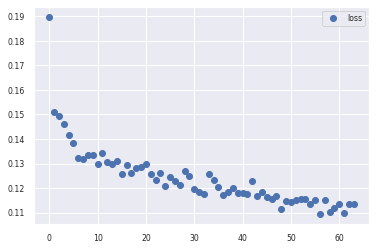

In [24]:
plt.plot(fit_hist.history['loss'], 'bo', label='loss')
plt.legend(loc='upper right')
plt.show()

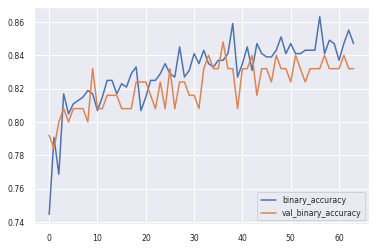

In [25]:
plt.plot(fit_hist.history['binary_accuracy'], label='binary_accuracy')
plt.plot(fit_hist.history['val_binary_accuracy'], label='val_binary_accuracy')
plt.legend(loc='lower right')
plt.show()

In [26]:
score = model.evaluate(X_test, Y_test, verbose=1)  #verbose : 0을 주면 진행상황을 보여주지 않음, defalt : 1
print('Keras DNN model loss:', score[0])
print('Keras DNN model accuracy:', score[1])

9/9 [==============================] - 0s 2ms/step - loss: 0.1330 - binary_accuracy: 0.8165
Keras DNN model loss: 0.13298262655735016
Keras DNN model accuracy: 0.8164793848991394
